## Data

Data Source: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_fraud.csv")

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Legit,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Legit,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Legit,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Legit,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Legit,red


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   uint8  
dtypes: float64(11), object(1), uint8(1)
memory usage: 615.6+ KB


In [30]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


## Exploritory Data Analysis

In [4]:
df['quality'].value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

<AxesSubplot:>

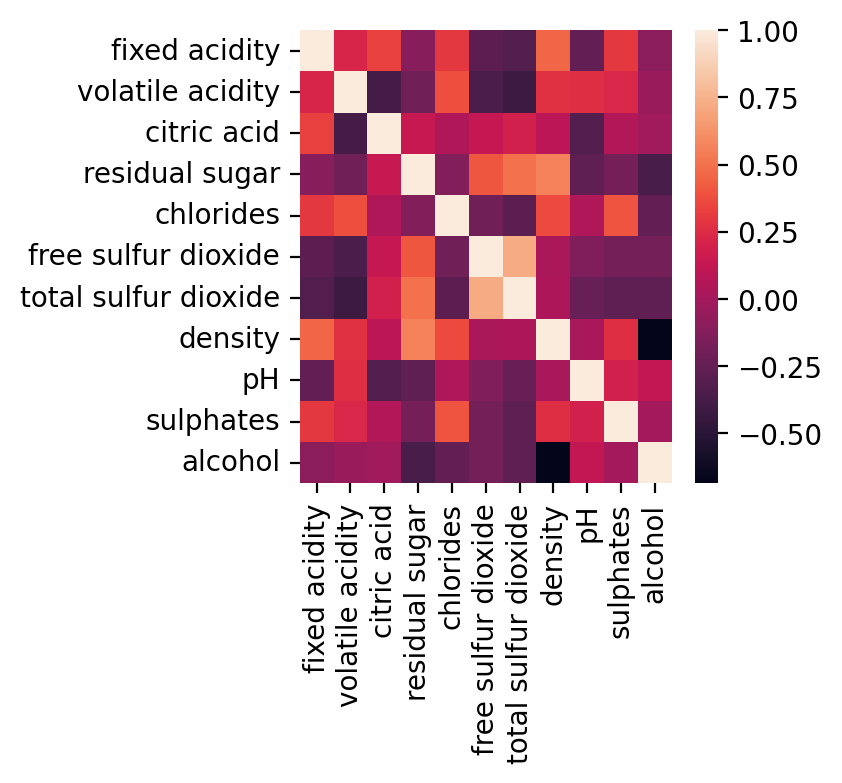

In [5]:
plt.figure(figsize=(3,3),dpi=200)
sns.heatmap(df.corr())

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029


In [32]:
data = df.copy()

data['quality'] = data['quality'].apply(lambda x : 0 if x=='Legit' else 1)

<AxesSubplot:>

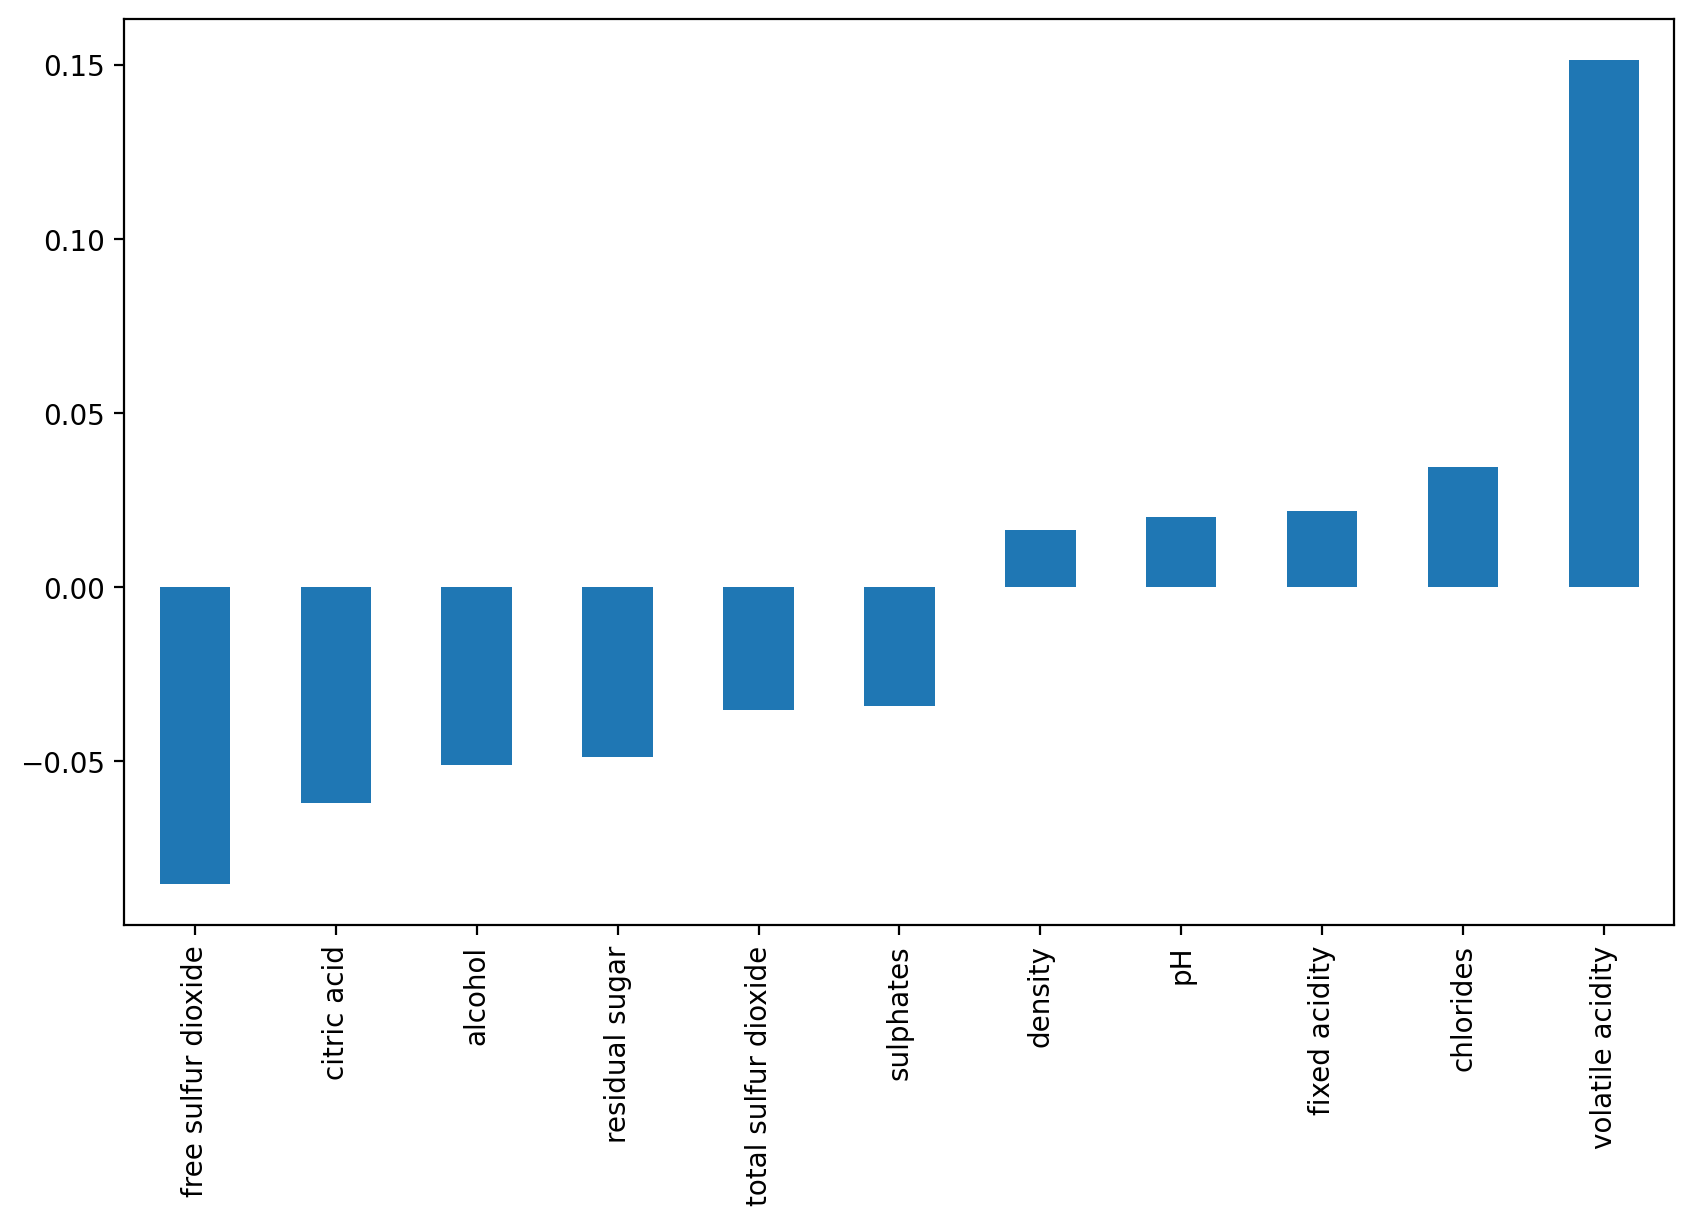

In [35]:
plt.figure(figsize=(10,6),dpi=200)
data.corr()['quality'][:-2].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='type', ylabel='count'>

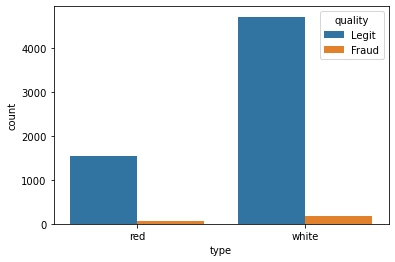

In [7]:
sns.countplot(x='type',hue='quality',data=df)

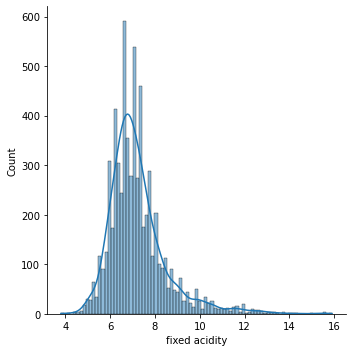

In [8]:
sns.displot(df, x="fixed acidity",kde=True)

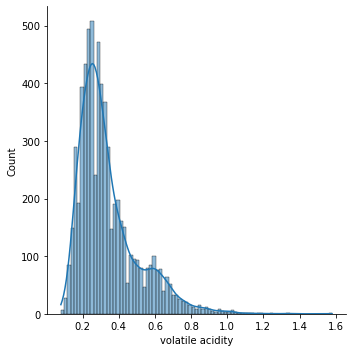

In [9]:
sns.displot(df, x="volatile acidity",kde=True)

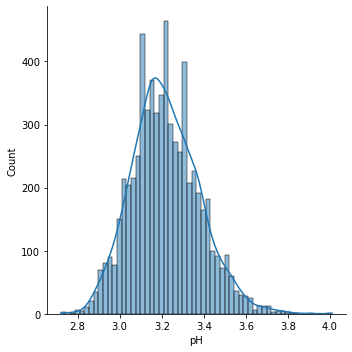

In [10]:
sns.displot(df, x="pH",kde=True)

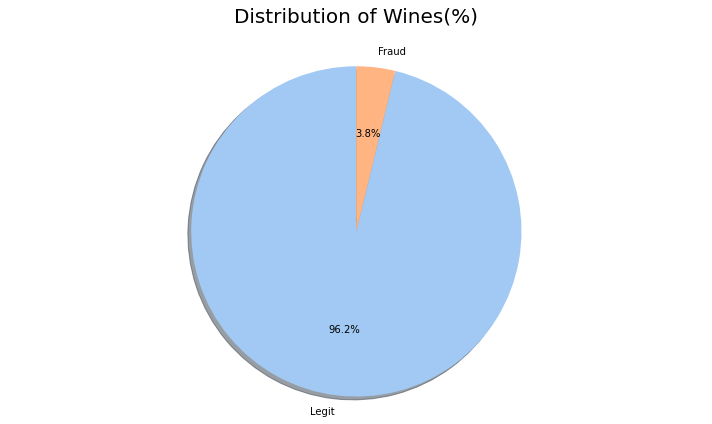

In [36]:
class_values = data['quality'].value_counts(normalize=True) * 100
labels = ['Legit','Fraud']

colors = sns.color_palette('pastel')[0:2]


fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.pie(class_values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors = colors)
ax1.axis('equal')
plt.title('Distribution of Wines(%)\n', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

In [11]:
df['type'] = pd.get_dummies(df['type'],drop_first=True)

In [12]:
X = df.drop('quality',axis=1)
y = df['quality']

In [13]:
from imblearn.under_sampling import NearMiss

undersample = NearMiss(version=1, n_neighbors=3)

X, y = undersample.fit_resample(X, y)

<AxesSubplot:xlabel='quality', ylabel='count'>

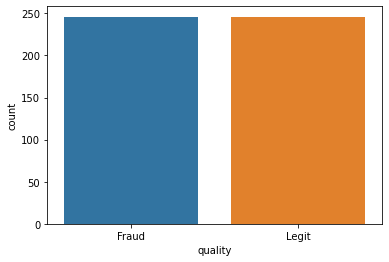

In [14]:
sns.countplot(x=y)

### Train Test Split and Data Scaling

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
#scaling data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modeling

### Support Vector Machines with Grid Search

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC(class_weight='balanced')

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svc,param_grid)

In [23]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [24]:
grid.best_params_

{'C': 1000, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

### Performance of the Support Vector Model

In [25]:
from sklearn.metrics import confusion_matrix,classification_report

In [55]:
svc_pred = grid.predict(scaled_X_test)
cfmtrx = confusion_matrix(y_test,svc_pred)

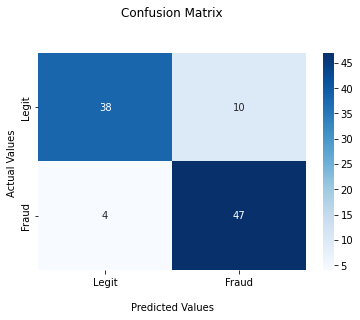

In [56]:
ax = sns.heatmap(cfmtrx, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Legit','Fraud'])
ax.yaxis.set_ticklabels(['Legit','Fraud'])

plt.show()

In [57]:
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

       Fraud       0.90      0.79      0.84        48
       Legit       0.82      0.92      0.87        51

    accuracy                           0.86        99
   macro avg       0.86      0.86      0.86        99
weighted avg       0.86      0.86      0.86        99



### Gradient Boosting with Grid Search

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

gb_model = GradientBoostingClassifier()

gb_grid = GridSearchCV(gb_model,param_grid)

gb_grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [41]:
gb_grid.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [42]:
gb_predictions = gb_grid.predict(scaled_X_test)

### Performance of the Gradient Boosting Model

In [43]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

       Fraud       0.98      0.92      0.95        48
       Legit       0.93      0.98      0.95        51

    accuracy                           0.95        99
   macro avg       0.95      0.95      0.95        99
weighted avg       0.95      0.95      0.95        99



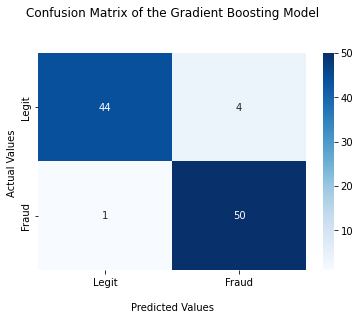

In [58]:
cfmtrx = confusion_matrix(y_test,gb_predictions)

ax = sns.heatmap(cfmtrx, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix of the Gradient Boosting Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Legit','Fraud'])
ax.yaxis.set_ticklabels(['Legit','Fraud'])

plt.show()

### Random Forest with Grid Search

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc = RandomForestClassifier()

In [47]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [48]:
rfc_grid = GridSearchCV(rfc,param_grid)

rfc_grid.fit(scaled_X_train,y_train)

C:\Users\burak\anaconda3\envs\mojave\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\burak\anaconda3\envs\mojave\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\burak\anaconda3\envs\mojave\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_fa

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [49]:
rfc_grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100, 'oob_score': False}

In [50]:
rfc_predictions = rfc_grid.predict(scaled_X_test)

### Performance of the Random Forest Model

In [51]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

       Fraud       0.98      0.90      0.93        48
       Legit       0.91      0.98      0.94        51

    accuracy                           0.94        99
   macro avg       0.94      0.94      0.94        99
weighted avg       0.94      0.94      0.94        99



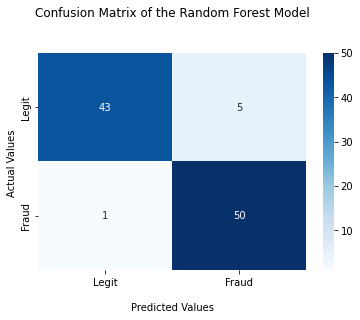

In [59]:
cfmtrx = confusion_matrix(y_test,rfc_predictions)

ax = sns.heatmap(cfmtrx, annot=True, cmap='Blues',fmt='g')

ax.set_title('Confusion Matrix of the Random Forest Model\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['Legit','Fraud'])
ax.yaxis.set_ticklabels(['Legit','Fraud'])

plt.show()